(1200, 800)


<IPython.core.display.Javascript object>


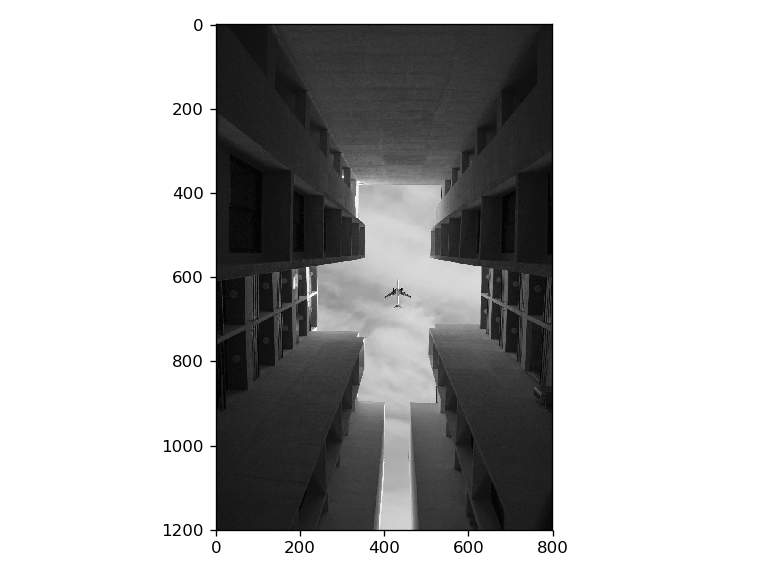

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

from skimage.io import imread,imshow,imsave

im = imread('airplane.jpg')
print(im.shape)

plt.figure()
imshow(im)
plt.show()

<IPython.core.display.Javascript object>


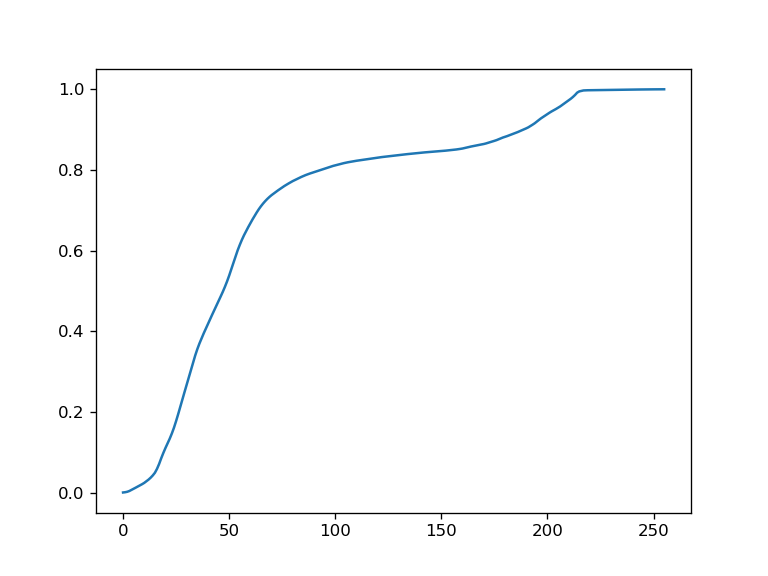

8 212


<IPython.core.display.Javascript object>


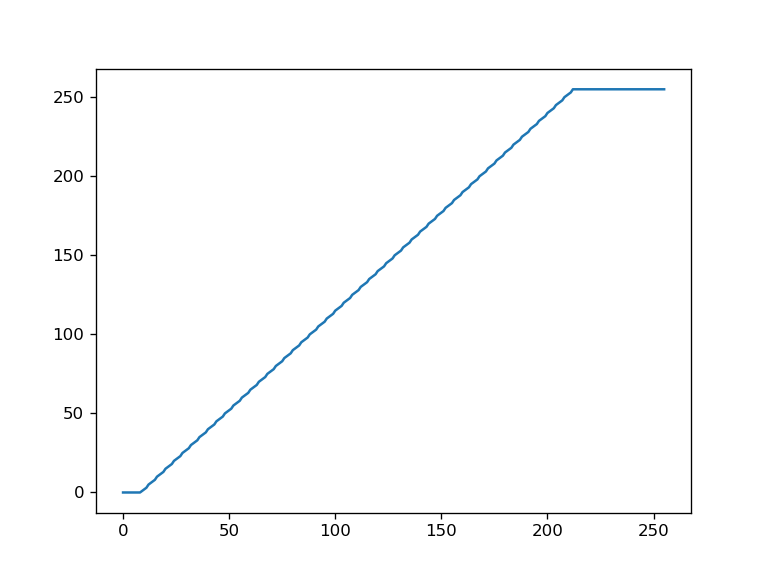

In [33]:
def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

h = cumul_hist(im)
plt.figure()
plt.plot(h)
plt.show()

for v in range(256):
    if h[v] > 0.02: break
Tmin = v-1

for v in range(256):
    if h[255-v] < 0.98: break
Tmax = (255-v)+1

print(Tmin,Tmax)

LUT = np.arange(256)
LUT[:Tmin] = 0
LUT[Tmax:] = 255
LUT[Tmin:Tmax] = (255/(Tmax-Tmin))*(LUT[Tmin:Tmax]-Tmin)

plt.figure()
plt.plot(LUT)
plt.show()

<IPython.core.display.Javascript object>


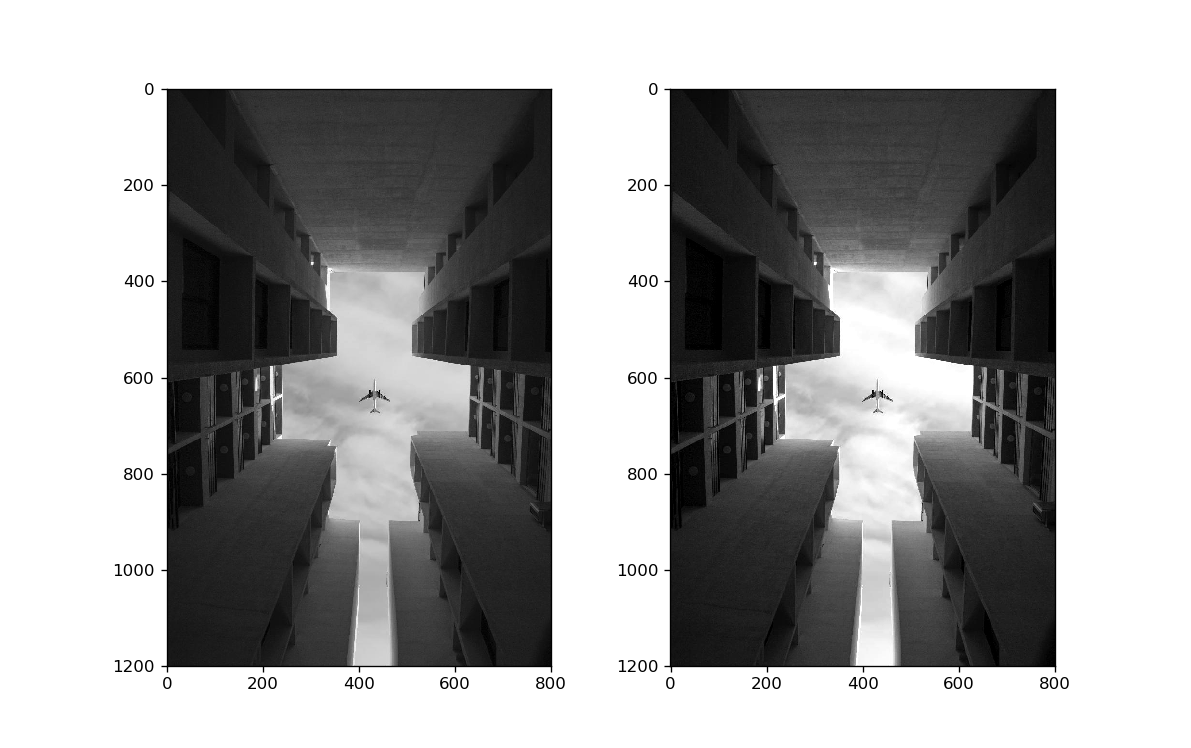

In [34]:
im_out = LUT[im]

plt.figure()
plt.gray()
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()